### 0. Import Packages

In [1]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#   load the dataframe -- this contains variables created and manipulated in the below data management sections
courses_new_working = pd.read_pickle('courses_new_working.pkl')

### 1. Data Management

In [438]:
#   check out the dataframe
courses_new_working

,title,short_description,institution,subject,price,length,effort,level,prerequisites,course_link,total_hours,total_hours_max,expected_hours,division,inst_type,log_exp_hrs
0,Introduction to Web Accessibility,Learn the best practices and guidelines needed...,Microsoft,Computer Science,0.0,5 weeks,3-4 hours per week,Intermediate,NaN,https://www.edx.org/course/introduction-web-ac...,15.0,20.0,17.5,Math/Sciences,Private Company,2.862201
1,Personnel Management for Public Libraries,Learn the foundational principles of personnel...,MichiganX,Art & Culture,0.0,4 weeks,2-4 hours per week,Introductory,Access to a public library community.,https://www.edx.org/course/personnel-managemen...,8.0,16.0,12.0,Humanities,Public/Non-Profit University,2.484907
2,Introduction to Data Analysis using Excel,"Learn the basics of Excel, one of the most pop...",Microsoft,Data Analysis & Statistics,0.0,4 weeks,2-4 hours per week,Introductory,Missing,https://www.edx.org/course/introduction-data-a...,8.0,16.0,12.0,Math/Sciences,Private Company,2.484907
3,Build Web APIs using ASP.NET,Learn the skills needed to create RESTful serv...,Microsoft,Computer Science,0.0,4 weeks,3-4 hours per week,Intermediate,Knowledge of C# Knowledge of web technologies ...,https://www.edx.org/course/build-web-apis-usin...,12.0,16.0,14.0,Math/Sciences,Private Company,2.639057
4,Islamic Finance and Banking: Modes of Finance,Learn about the different modes of Islamic Fin...,IRTIx,Economics & Finance,0.0,4 weeks,3-4 hours per week,Introductory,None,https://www.edx.org/course/islamic-finance-ban...,12.0,16.0,14.0,Social Sciences,Private Company,2.639057
5,Knowledge Management and Big Data in Business,Learn about the integrative power of knowledge...,HKPolyUx,Business & Management,0.0,6 weeks,6-8 hours per week,Introductory,None,https://www.edx.org/course/knowledge-managemen...,36.0,48.0,42.0,Social Sciences,Public/Non-Profit University,3.737670
6,Introduction to Java Programming Part 1,Learn the fundamental elements of Java program...,HKUSTx,Computer Science,0.0,5 weeks,3-5 hours per week,Introductory,None,https://www.edx.org/course/introduction-java-p...,15.0,25.0,20.0,Math/Sciences,Public/Non-Profit University,2.995732
7,Introduction to Java Programming Part 2,The first MOOC to teach the fundamental elemen...,HKUSTx,Computer Science,0.0,5 weeks,3-5 hours per week,Introductory,Introduction to Java Programming Part 1 - COMP...,https://www.edx.org/course/introduction-java-p...,15.0,25.0,20.0,Math/Sciences,Public/Non-Profit University,2.995732
8,Introduction to Mobile Application Development...,Learn the basics of mobile application develop...,HKUSTx,Computer Science,0.0,6 weeks,3-5 hours per week,Introductory,Basics of Java programming OR COMP102x OR COMP...,https://www.edx.org/course/introduction-mobile...,18.0,30.0,24.0,Math/Sciences,Public/Non-Profit University,3.178054
9,Portfolio Management & Governance,Learn how a Project Management Office (PMO) wo...,UWashingtonX,Business & Management,0.0,4 weeks,2-5 hours per week,Introductory,None.,https://www.edx.org/course/portfolio-managemen...,8.0,20.0,14.0,Social Sciences,Public/Non-Profit University,2.639057


In [271]:
###   the effort and length values were not standardized, this cleans everything so that effort is a string of 
###   "X hours per week" or "X hours" if the course didn't specify hours per week

courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='/', value=' per ', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='hrs', value='hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='About ', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' - ', value='-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=', depending on background.', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' to ', value='-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' \(depending on background\)', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' of material covered', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' \\x89ÛÒ ', value='-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=', self-paced', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='45 minutes', value='.75', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='\\x89ÛÒ6', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='heures', value='hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Most users will find that thoroughly covering the material will take anywhere from ', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='; 75 hours', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='-complete entire course', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Total Effort: ', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Part 1: 3 hours; Part 2: 4 hours; Part 3: 2 hours', value='9 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='12 hours per week \(7 weeks\)', value = '12 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Week', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' total', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='4 per 5 hours per week', value = '4-5 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='9 problem sets \(10-20 hours each\), 1 final project', value = '90-210 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='1 hour per module; 7 modules', value = '7 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='- ', value = '-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' -', value = '-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='semaine', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' are anticipated. Additional hours may be required for learners seeking additional practice', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='; midterm exam; final exam', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='From 10-60 minutes, or as much time as you want\.', value = '.16-1 hour', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='5 hours of per week', value = '5 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Hours', value = 'hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='per  week', value = 'per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' for the entire course', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' depending on the background of the student\.', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='; 2-3 hours for lectures; 3-5 hours for homework per self-study', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='~', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='module of material', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='module', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' â€“ ', value = '-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='â€“', value = '-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' \| å°\\x8fæ—¶ï¼\\x8få‘¨', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Student progress through the course is self-paced', value = 'self-paced', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Estimated effort: ', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='3-4 hours per unit \(recommended pace: 1 unit per week\)', value = '3-4 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='5 sections, 1-2 hours per section', value = '5-10 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='4-6 hours per unit or week', value = '4-6 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='-complete exam', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='unit', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='48 hours, Self-paced', value = '48 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='section', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='10 weeks', value = 'self-paced', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='week.', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='hours.', value = 'hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='hoursper', value = 'hours per', regex = True)

courses_new_working['length'] = courses_new_working['length'].replace(to_replace='4 weeks, self-paced', value = '4 weeks', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace=' of content to be completed at student\'s own pace during 13 week window \(Sept 15 - Dec 15, 2016\)', value = '', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='Each student\'s path to mastery is individual', value = 'self-paced', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='; we expect you to complete the course in 30-40 hours', value = '', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace=' \(8 units\)', value = '', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='see FAQ', value = 'Missing', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='100 days', value = '14 weeks', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace=2, value = '2 weeks', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='sections', value = 'weeks', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='nan', value = 'Missing', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='Week', value = 'week', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='Self', value = 'self', regex = True)

###   change FREE to 0 in price column
courses_new_working['price'].replace('FREE', 0, inplace=True)

In [149]:
###   save the df as a pkl doc
courses_new_working.to_pickle('courses_new_working.pkl')

In [242]:
###   in case there are return value characters in cells - replace them with blanks
courses['prerequisites'] = courses['prerequisites'].replace(to_replace='\r', value = ' ', regex = True)
courses['short_description'] = courses['short_description'].replace(to_replace='\r', value = ' ', regex = True)

In [262]:
###   in case you need to import the excel backup
courses_new = pd.read_excel('courses_new_master.xlsx', header=0)

In [49]:
###   create total course hours min column. if the effort column is measured in hrs/week, 
###   we multiply length (in weeks) by lower bound of effort (hrs/week). 
###   If effort is total hours, then we just take that number.
###   this uses regex to pull the appropriate values based on various conditionals


courses_new_working['total_hours'] = np.where(courses_new_working['effort'].str.contains('week'), courses_new_working['length'].str.extract('^(\d+)').astype(float)*courses_new_working['effort'].str.extract('^(\d+)').astype(float), courses_new_working['effort'].str.extract('^(\d+)').astype(float))


/Users/Patrick/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [57]:
###   create total hours max column. if the effort column is measured in hrs/week, 
###   we multiply length (in weeks) by upper bound of effort (hrs/week). 
###   If effort is total hours, then we just take that number.


courses_new_working['total_hours_max'] = np.where(courses_new_working['effort'].str.contains('week'), courses_new_working['length'].str.extract('^(\d+)').astype(float)*courses_new_working['effort'].str.extract('^\d+-(\d+)').astype(float), courses_new_working['effort'].str.extract('^(\d+)').astype(float))


/Users/Patrick/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [62]:
###   get expected total hours (average of min/max total hours if available. else, take the total expected hours given)

courses_new_working['expected_hours'] = np.where((courses_new_working['total_hours'] > 0) & (courses_new_working['total_hours_max'] > 0), ((courses_new_working['total_hours']) + (courses_new_working['total_hours_max']))/2.0, courses_new_working['total_hours'])


In [78]:
###   group the subjects into 3 divisions

def f(row):
    if row['subject'] in ['Computer Science', 'Data Analysis & Statistics',
       'Health & Safety', 'Math', 'Engineering', 'Physics', 'Biology & Life Sciences',
       'Science', 'Medicine', 'Chemistry', 'Environmental Studies',
       'Energy & Earth Sciences', 'Food & Nutrition', 'Architecture', 'Electronics']:
        val = 'Math/Sciences'
    elif row['subject'] in ['Economics & Finance', 'Business & Management', 
                              'Social Sciences', 'Communication', 'Law', 
                              'History', 'Ethics', 'Philosophy & Ethics',
                              'Education & Teacher Training', 'Music']:
        val = 'Social Sciences'
    else:
        val = 'Humanities'
    return val

courses_new_working['division'] = courses_new_working.apply(f, axis=1)

In [276]:
###   group the institutions into 3 divisions: public or non-profit university, private company, other non-profit company/org
###   this sets up the lists

pub_or_non_profit_u = ['MichiganX','HKPolyUx','HKUSTx','UWashingtonX','UQx', 'RITx','DelftX', 'UTAustinX', 'KyotoUx',
               'OsakaUx', 'BabsonX', 'WellesleyX', 'Wharton', 'BerkleeX',
               'HarvardX', 'RiceX','ANUx','EPFLx','UC BerkeleyX', 'PennX','UBCx','MITx',
               'UC San DiegoX','WitsX','USMx','Weston High School',
               'UTSanAntonioX','IIMBx','TUMx','CurtinX','ETHx','WageningenX','LouvainX', 'UTHealthSPHx',
               'ChalmersX','ColumbiaX','UC3Mx','KULeuvenX','GeorgetownX','TeachersCollegeX','TsinghuaX', 'ASUx',
               'DartmouthX', 'UPValenciaX','AdelaideX','UAMx','MEPhIx','ImperialX', 'IITBombayX',
               'CornellX', 'GTx', 'BUx', 'EdinburghX','UTMBx','UTPermianBasinX','Davidson Next',
               'University of TorontoX', 'UTokyoX','RWTHx','GalileoX','TrinityX','UTArlingtonX','IDBx','PurdueX',
               'kironX','NewcastleX','ThunderbirdX','HKUx','CaltechX','KTHx','MISISx','TokyoTechX','NotreDameX',
               'KIx','DavidsonX','UTennesseeX', 'Cooper Union', 'HarveyMuddX','PrincetonX',
               'BrownX','IMTx','VictoriaX','PerkinsX','ITMOx','OxfordX', 'SmithX', 'SNUx', 'HamiltonX','UrFUx',
               'PekingX', 'ColgateX','St. Margarets Episcopal School', 'WasedaX','UChicagoX','McGillX']
private = ['New York Institute of Finance','SchoolYourself','Microsoft','IRTIx','TenarisUniversity','Red Hat','MongoDBx']
non_profit_org = ['ETSx','LinuxFoundationX','IEEEx','W3Cx','CatalystX','MandarinX','SmithsonianX',
                 'Amnesty InternationalX','FullbridgeX','edX','ACCA','WBGx','Tennessee Board of Regents','Bibliotheca Alexandrina',
                 'IMFx','Save A LifeX','OECx']

In [277]:
###   this function adds a new column to the dataset indicating the institution type, based on lists above

def g(row):
    if row['institution'] in pub_or_non_profit_u:
        val = 'Public/Non-Profit University'
    elif row['institution'] in private:
        val = 'Private Company'
    else:
        val = 'Non-Profit Company or Other Organization'
    return val

courses_new_working['inst_type'] = courses_new_working.apply(g, axis=1)

In [357]:
###   creates a new column, log transformation of expected hours - for the ANOVA test later on

courses_new_working['log_exp_hrs'] = np.log(courses_new_working['expected_hours'])

In [433]:
###   gets the count, mean, var of expected hours by institution type

courses_new_working.groupby('inst_type',).agg({'expected_hours':['count','mean','var']})

expected_hours             \
                                                  count       mean   
inst_type                                                            
Non-Profit Company or Other Organization             70  33.571429   
Private Company                                     126  15.928571   
Public/Non-Profit University                        997  40.399699   

                                                       
                                                  var  
inst_type                                              
Non-Profit Company or Other Organization  5132.770186  
Private Company                            128.842857  
Public/Non-Profit University              1176.684709

In [432]:
###   gets the count, mean, var of log(expected hours) by institution type

courses_new_working.groupby('inst_type',).agg({'log_exp_hrs':['count','mean','var']})

log_exp_hrs                    
                                               count      mean       var
inst_type                                                               
Non-Profit Company or Other Organization          70  2.828452  1.108878
Private Company                                  126  2.534504  0.535939
Public/Non-Profit University                     997  3.376644  0.695310

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning:

invalid value encountered in greater_equal

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning:

invalid value encountered in less_equal



(array([   3.,    5.,   11.,   24.,   89.,  188.,  263.,  189.,  133.,
          77.,   15.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
          9. ,   9.5,  10. ]),
 <a list of 20 Patch objects>)

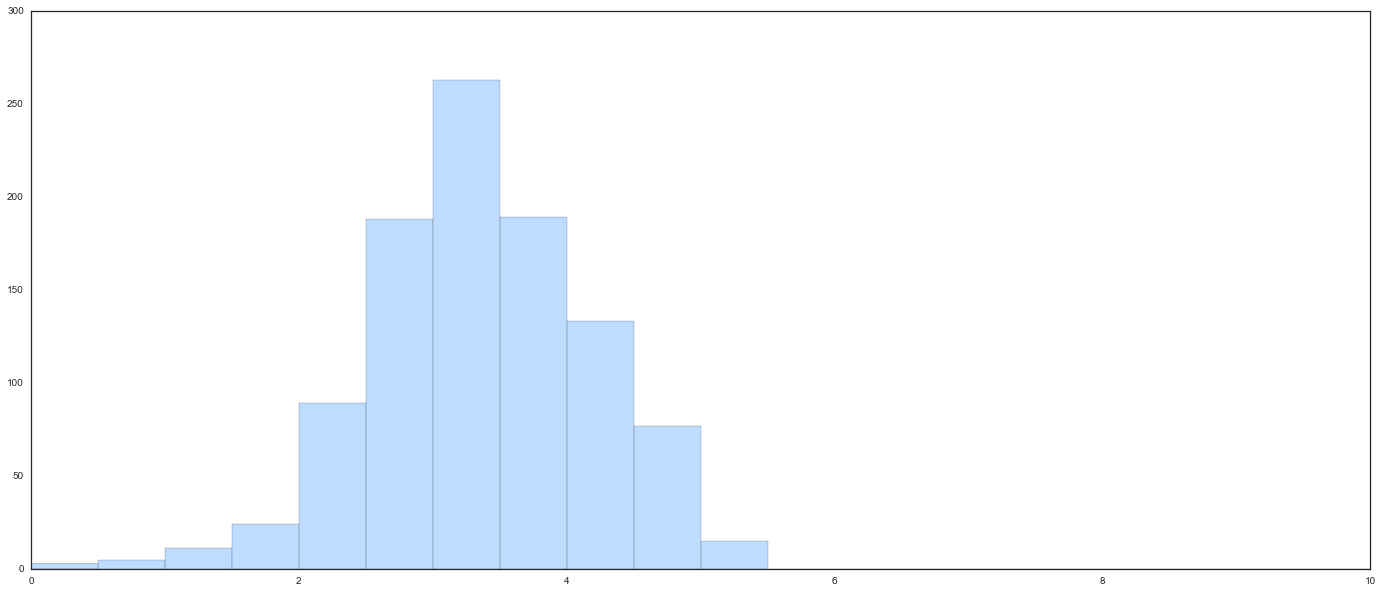

In [361]:
plt.hist(courses_new_working[courses_new_working['inst_type'] == 'Public/Non-Profit University']["log_exp_hrs"].reset_index(drop=True), range = (0.0, 10.0), bins = 20, alpha=0.6, label="Public")


#np.histogram(courses_new_working.loc[courses_new_working['inst_type'] == 'Public/Non-Profit University']['expected_hours'], range = (0, 100))

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning:

invalid value encountered in greater_equal

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning:

invalid value encountered in less_equal



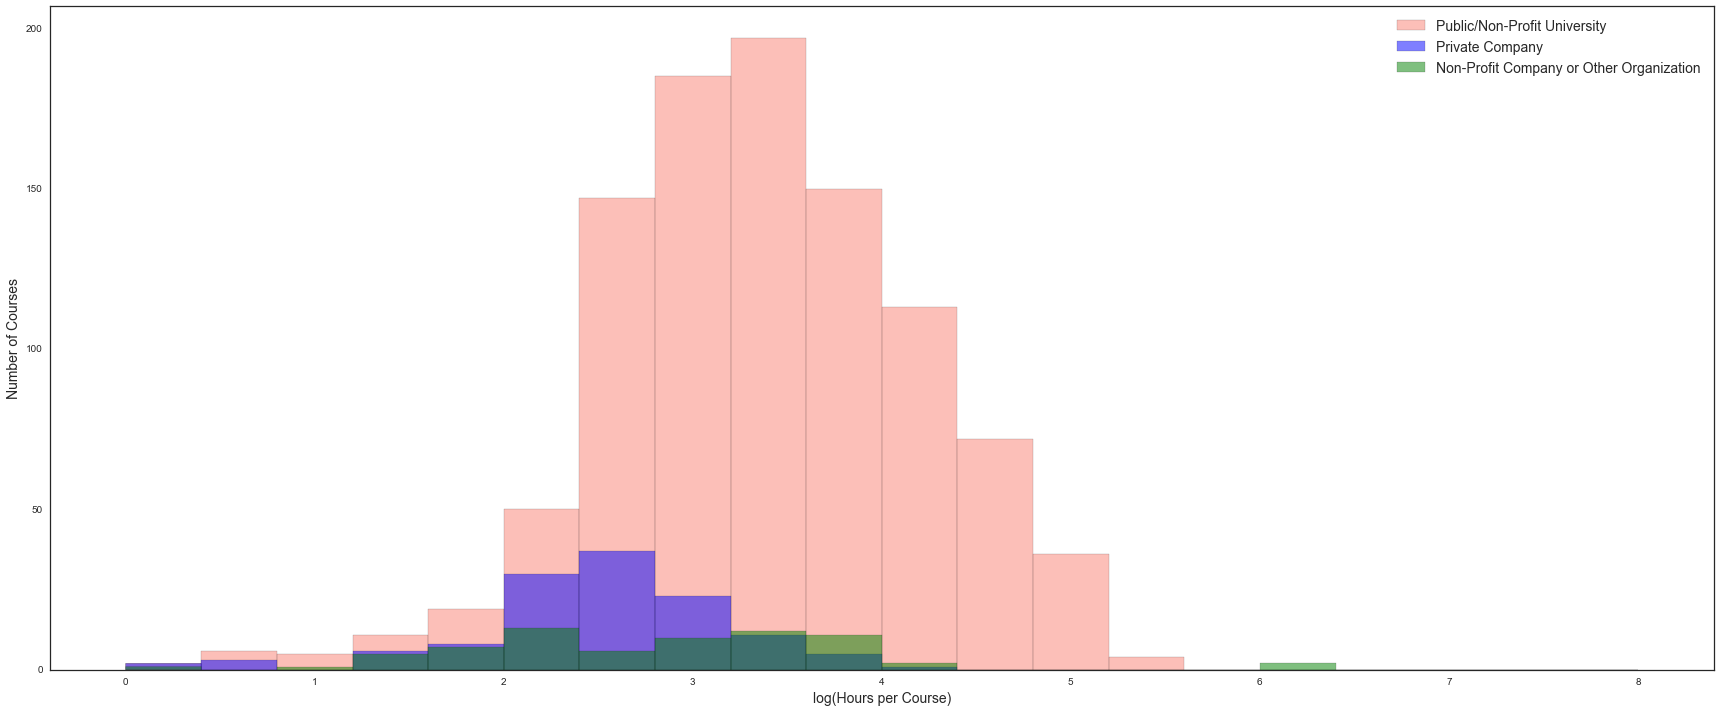

In [431]:
private = courses_new_working[courses_new_working['inst_type'] == 'Private Company']["log_exp_hrs"].reset_index(drop=True)
publicu = courses_new_working[courses_new_working['inst_type'] == 'Public/Non-Profit University']["log_exp_hrs"].reset_index(drop=True)
nonprofit = courses_new_working[courses_new_working['inst_type'] == 'Non-Profit Company or Other Organization']["log_exp_hrs"].reset_index(drop=True)


fig, ax = plt.subplots()

ax.hist(publicu, range = (0.0, 8.0), bins = 20, color='salmon', alpha=0.5, label = 'Public/Non-Profit University')
ax.hist(private, range = (0.0, 8.0), bins = 20, color='blue', alpha=0.5, label ='Private Company')
ax.hist(nonprofit, range = (0.0, 8.0), bins = 20, color='green', alpha=0.5, label = 'Non-Profit Company or Other Organization')

ax.set_xlabel('log(Hours per Course)', fontsize = 14)
ax.set_ylabel('Number of Courses', fontsize = 14)

ax.margins(0.05)
ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 14)

plt.tight_layout()

plt.savefig("inst_type_log_hours.png")

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning:

invalid value encountered in greater_equal

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning:

invalid value encountered in less_equal



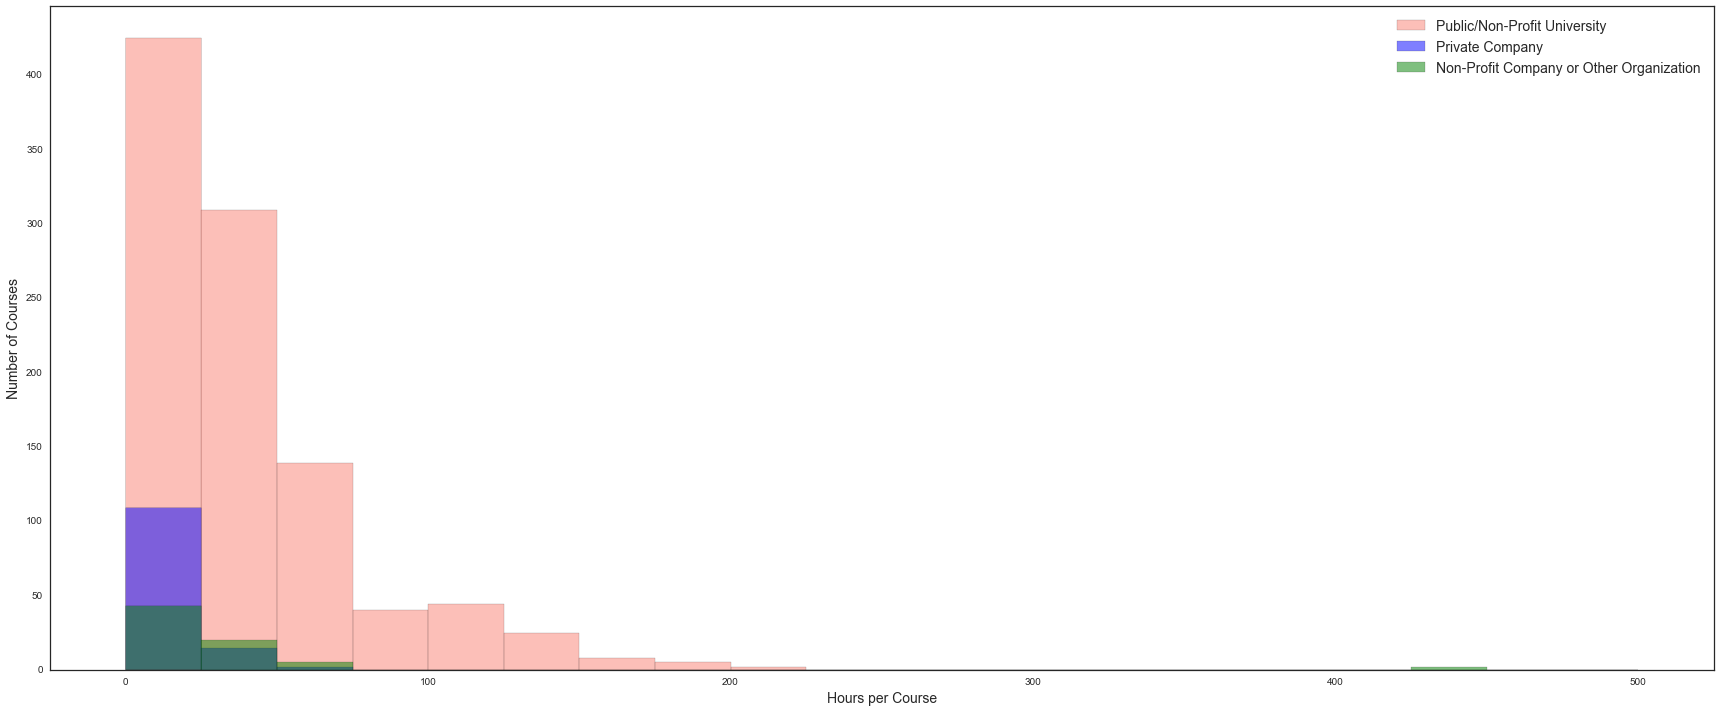

In [430]:
private = courses_new_working[courses_new_working['inst_type'] == 'Private Company']["expected_hours"].reset_index(drop=True)
publicu = courses_new_working[courses_new_working['inst_type'] == 'Public/Non-Profit University']["expected_hours"].reset_index(drop=True)
nonprofit = courses_new_working[courses_new_working['inst_type'] == 'Non-Profit Company or Other Organization']["expected_hours"].reset_index(drop=True)


fig, ax = plt.subplots()

ax.hist(publicu, range = (0.0, 500.0), bins = 20, color='salmon', alpha=0.5, label = 'Public/Non-Profit University')
ax.hist(private, range = (0.0, 500.0), bins = 20, color='blue', alpha=0.5, label ='Private Company')
ax.hist(nonprofit, range = (0.0, 500.0), bins = 20, color='green', alpha=0.5, label = 'Non-Profit Company or Other Organization')

ax.set_xlabel('Hours per Course', fontsize = 14)
ax.set_ylabel('Number of Courses', fontsize = 14)

ax.margins(0.05)
ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 14)

plt.tight_layout()

plt.savefig("inst_type_hours_dist.png")

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning:

invalid value encountered in greater_equal

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning:

invalid value encountered in less_equal



(array([  1.,   0.,   6.,   7.,  18.,   5.,  14.,  15.,   2.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
          9. ,   9.5,  10. ]),
 <a list of 20 Patch objects>)

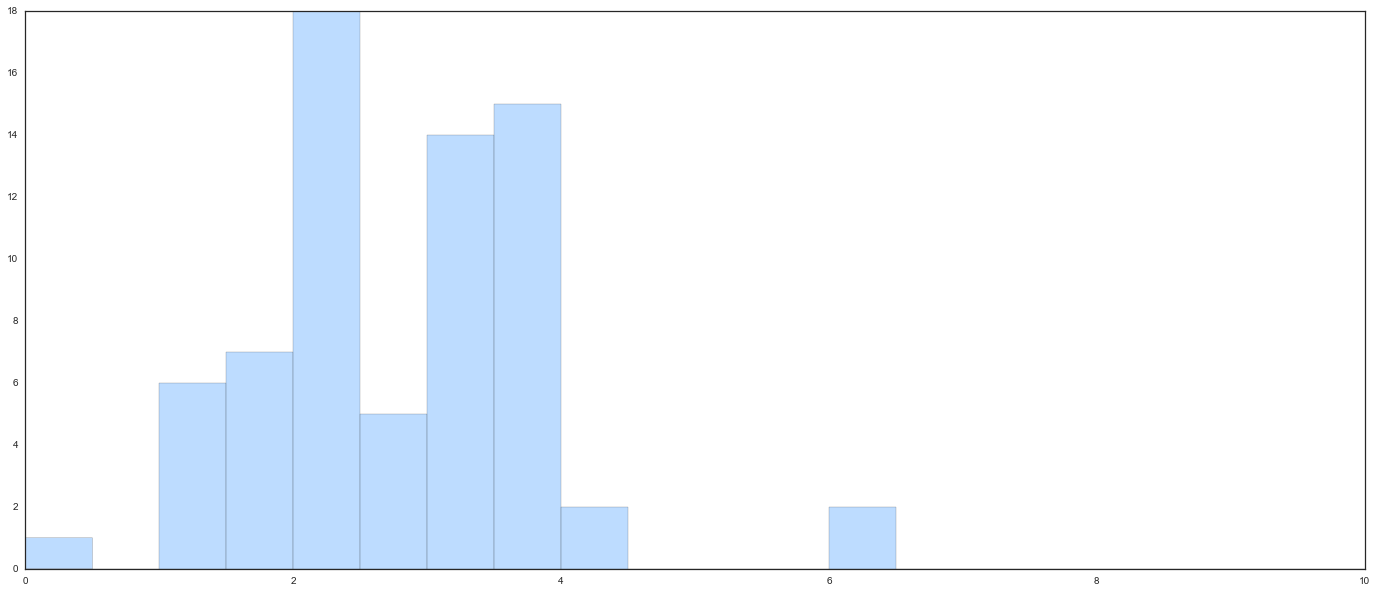

In [364]:
plt.hist(courses_new_working[courses_new_working['inst_type'] == 'Non-Profit Company or Other Organization']["log_exp_hrs"].reset_index(drop=True), range = (0.0, 10.0), bins = 20, alpha=0.6, label="Private")


In [302]:
subject_inst_type_counts = pd.DataFrame(courses_new_working.groupby(['subject','inst_type']).size().rename('counts')).reset_index()


In [370]:
courses_ftest = courses_new_working[np.isfinite(courses_new_working['log_exp_hrs'])]

stats.f_oneway(courses_ftest[courses_ftest['inst_type'] == 'Non-Profit Company or Other Organization']["log_exp_hrs"],
               courses_ftest[courses_ftest['inst_type'] == 'Private Company']["log_exp_hrs"],
               courses_ftest[courses_ftest['inst_type'] == 'Public/Non-Profit University']["log_exp_hrs"])

F_onewayResult(statistic=66.114260711845702, pvalue=5.930100458064523e-28)

In [303]:
subject_inst_type_counts = subject_inst_type_counts.pivot(index='subject', columns='inst_type', values='counts').reset_index()

In [305]:
# subject_inst_type_counts['total'] = np.nansum([subject_inst_type_counts['Non-Profit Company or Other Organization'],
#                                        subject_inst_type_counts['Private Company'],
#                                        subject_inst_type_counts['Public/Non-Profit University']])

subject_inst_type_counts['total'] = subject_inst_type_counts.sum(axis=1)


In [315]:
subject_inst_type_counts = subject_inst_type_counts.sort_values(['total'], ascending = False)
subject_inst_type_counts = subject_inst_type_counts.fillna(value = 0)
subject_inst_type_counts['pct_np'] = subject_inst_type_counts['Non-Profit Company or Other Organization']/subject_inst_type_counts['total']
subject_inst_type_counts['pct_pc'] = subject_inst_type_counts['Private Company']/subject_inst_type_counts['total']

In [331]:
subject_inst_type_counts['pct_np_pc'] = subject_inst_type_counts['pct_np']+subject_inst_type_counts['pct_pc']

In [386]:
#create list of subjects ordered by total number of courses (for ordered violin plot)
subject_order_list = subject_inst_type_counts['subject'].tolist()

math = ['Computer Science', 'Data Analysis & Statistics',
       'Health & Safety', 'Math', 'Engineering', 'Physics', 'Biology & Life Sciences',
       'Science', 'Medicine', 'Chemistry', 'Environmental Studies',
       'Energy & Earth Sciences', 'Food & Nutrition', 'Architecture', 'Electronics']
math_ordered = []

for x in subject_order_list:
    if x in math:
        math_ordered.append(x)

soc_science = ['Economics & Finance', 'Business & Management', 'Social Sciences', 
               'Communication', 'Law','History', 'Ethics', 'Philosophy & Ethics',
               'Education & Teacher Training', 'Music']

soc_sci_ordered = []

for x in subject_order_list:
    if x in soc_science:
        soc_sci_ordered.append(x)
        
humanities = ['Art & Culture', 'Design', 'Humanities', 'Language', 'Literature']

hum_ordered = []

for x in subject_order_list:
    if x in humanities:
        hum_ordered.append(x)


In [389]:
hum_ordered

['Humanities', 'Literature', 'Art & Culture', 'Language', 'Design']

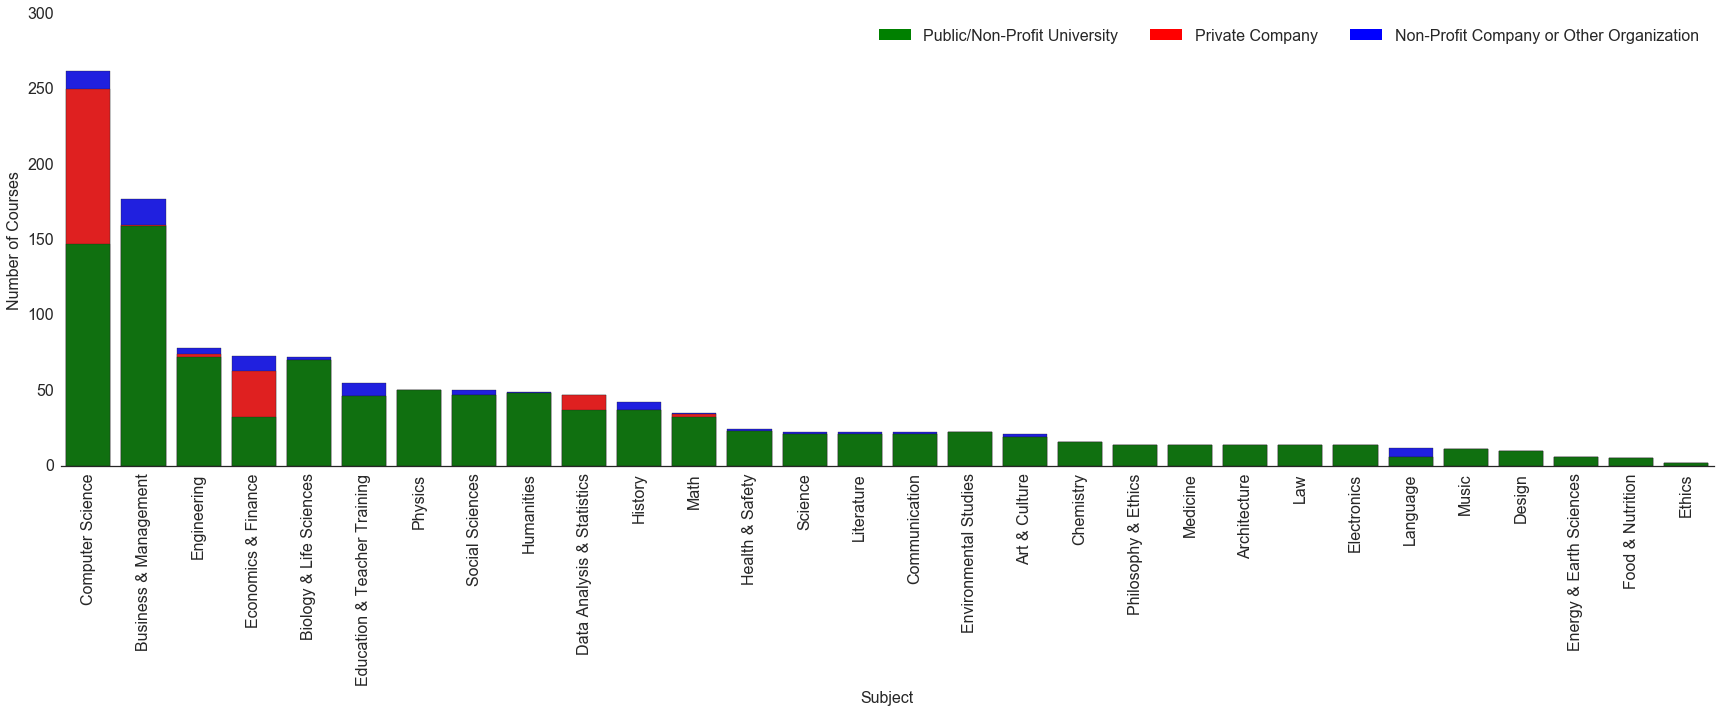

In [404]:
%matplotlib inline

#Read in data & create total column
# stacked_bar_data = pd.read_csv("C:\stacked_bar.csv")
# stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = subject_inst_type_counts['subject'], 
            y = subject_inst_type_counts['total'], 
            color = "blue")

#Plot 2 - overlay - "middle" series
bottom_plot = sns.barplot(x = subject_inst_type_counts['subject'], 
                          y = subject_inst_type_counts['Private Company']+subject_inst_type_counts['Public/Non-Profit University'], 
                          color = "red")

#Plot 3 - overlay - "bottom" series
bottom_plot = sns.barplot(x = subject_inst_type_counts['subject'], 
                          y = subject_inst_type_counts['Public/Non-Profit University'], 
                          color = "green")



topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
midbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')

l = plt.legend([bottombar, midbar, topbar], ['Public/Non-Profit University', 
                                             'Private Company', 
                                             'Non-Profit Company or Other Organization'], loc=1, ncol = 3, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Number of Courses")
bottom_plot.set_xlabel("Subject")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

plt.xticks(rotation=90)

plt.tight_layout()

plt.savefig("courses_by_inst_type.png")

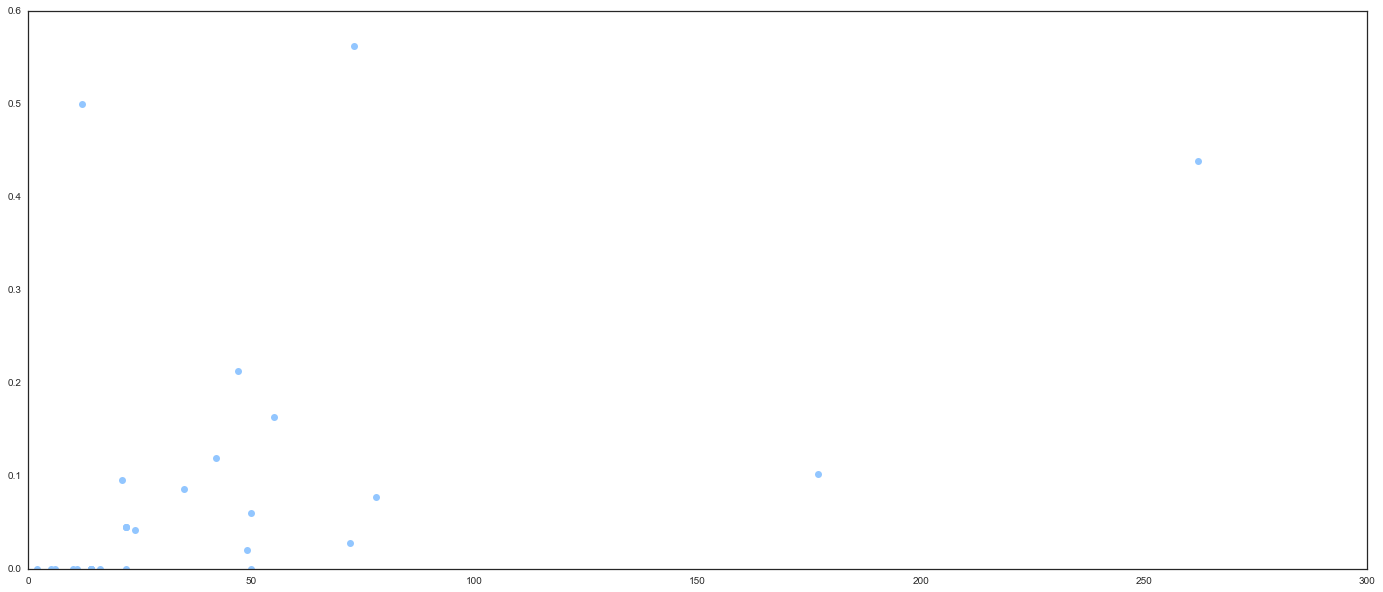

In [333]:
plt.plot(subject_inst_type_counts['total'], subject_inst_type_counts['pct_np_pc'], "o")

In [ ]:
###regression

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


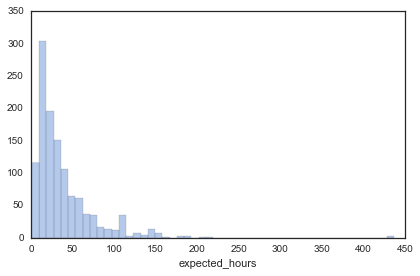

In [88]:
##Histogram of course length/commitment
sns.set(style="white", palette="muted", color_codes=True)
# rs = np.random.RandomState(10)

# # Set up the matplotlib figure
# f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
# sns.despine(left=True)

# # Generate a random univariate dataset
# d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(courses_new_working['expected_hours'].dropna(), kde=False, color="b")

# # Plot a kernel density estimate and rug plot
# sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# # Plot a filled kernel density estimate
# sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# # Plot a historgram and kernel density estimate
# sns.distplot(d, color="m", ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [10]:
type(courses_new_working['subject'])

pandas.core.series.Series

In [12]:
courses_new_working.groupby('institution',).agg({'price':['mean', 'median'], 'expected_hours':['mean', 'median']})
;

''

In [14]:
courses_new_working.groupby('subject',).agg({'price':['mean', 'median'], 'expected_hours':['mean', 'median']})
;

''

In [16]:
courses_new_working.groupby('institution').count()
;

''

In [31]:
courses_new_working.groupby(['institution','subject']).count()
;

''

In [80]:

subject_counts = pd.DataFrame(courses_new_working.groupby(['division','subject']).size().rename('counts')).reset_index()
subject_counts

,division,subject,counts
0,Humanities,Art & Culture,21
1,Humanities,Design,10
2,Humanities,Humanities,49
3,Humanities,Language,12
4,Humanities,Literature,22
5,Math/Sciences,Architecture,14
6,Math/Sciences,Biology & Life Sciences,72
7,Math/Sciences,Chemistry,16
8,Math/Sciences,Computer Science,262
9,Math/Sciences,Data Analysis & Statistics,47


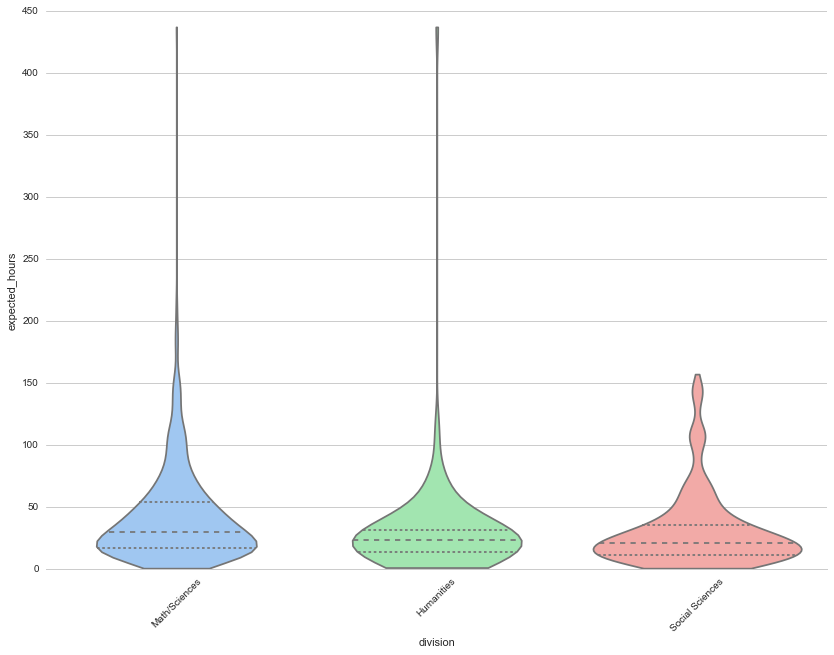

In [121]:
a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="division", 
               y="expected_hours", 
               data = courses_new_working,
               inner="quart", size = 20, cut = 0)

sns.despine(left=True)
plt.xticks(rotation=45)
plt.show()

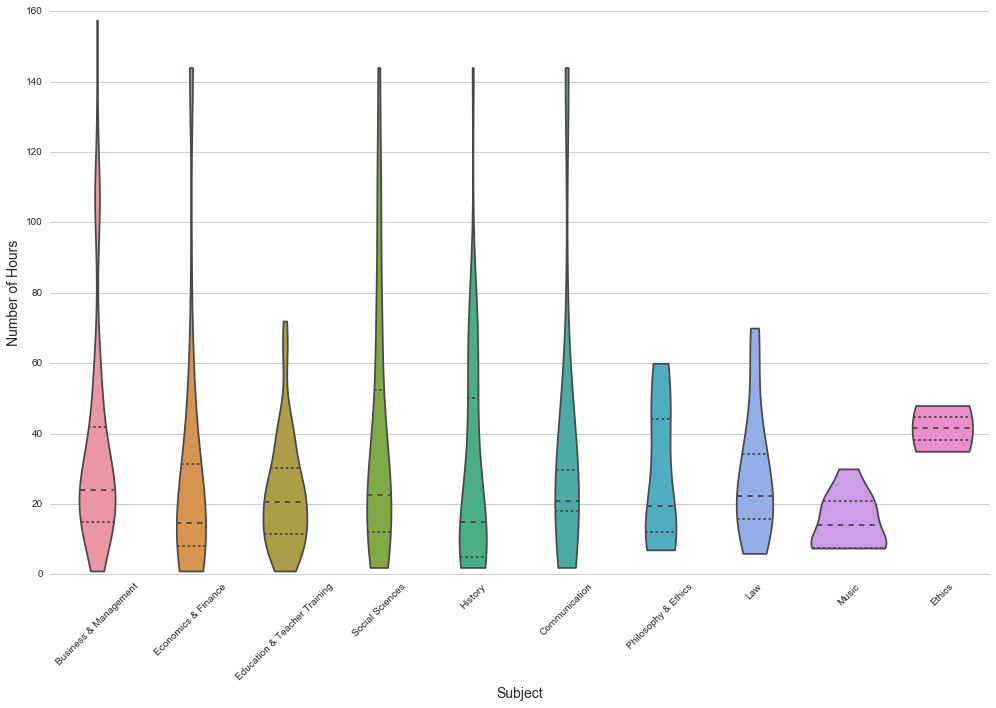

In [400]:
a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

g1 = sns.violinplot(x="subject", 
               y="expected_hours", 
               data = courses_new_working[courses_new_working['division'] == 'Social Sciences'],
               order = soc_sci_ordered,
               inner="quart", size = 20, cut = 0)

ax.set_ylabel('Number of Hours', fontsize = 14)
ax.set_xlabel('Subject', fontsize = 14)

sns.despine(left=True)
plt.xticks(rotation=45)

plt.tight_layout()
g1.figure.savefig("SS_courses_length_dist.png")


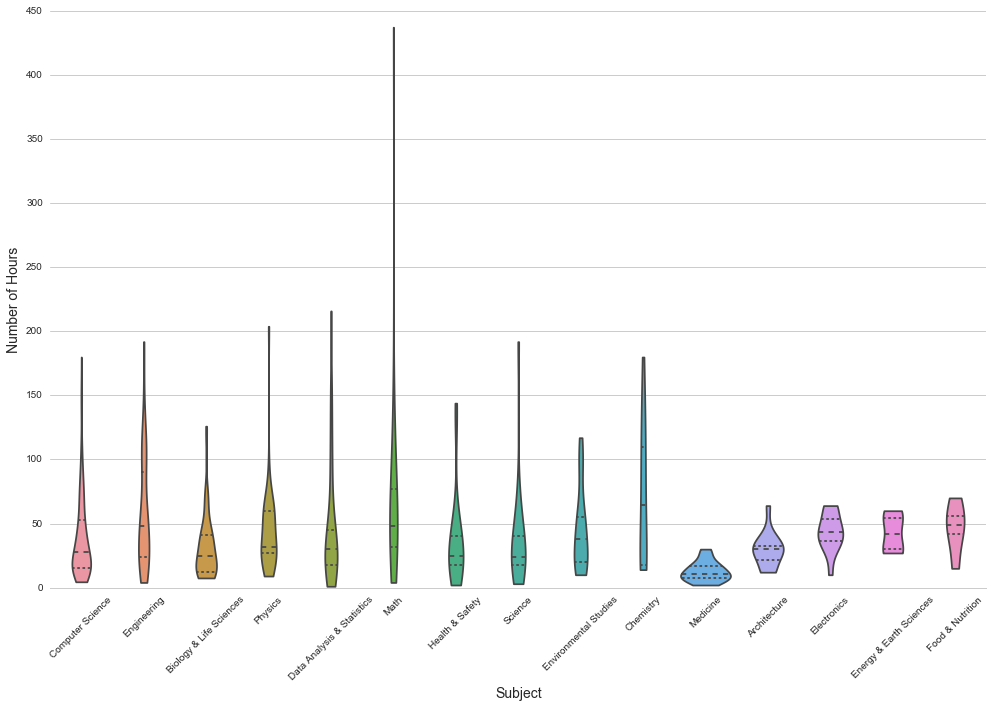

In [401]:
a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

g1 = sns.violinplot(x="subject", 
               y="expected_hours", 
               data = courses_new_working[courses_new_working['division'] == 'Math/Sciences'],
               order = math_ordered,
               inner="quart", size = 20, cut = 0)

ax.set_ylabel('Number of Hours', fontsize = 14)
ax.set_xlabel('Subject', fontsize = 14)

sns.despine(left=True)
plt.xticks(rotation=45)

plt.tight_layout()
g1.figure.savefig("MATH_courses_length_dist.png")

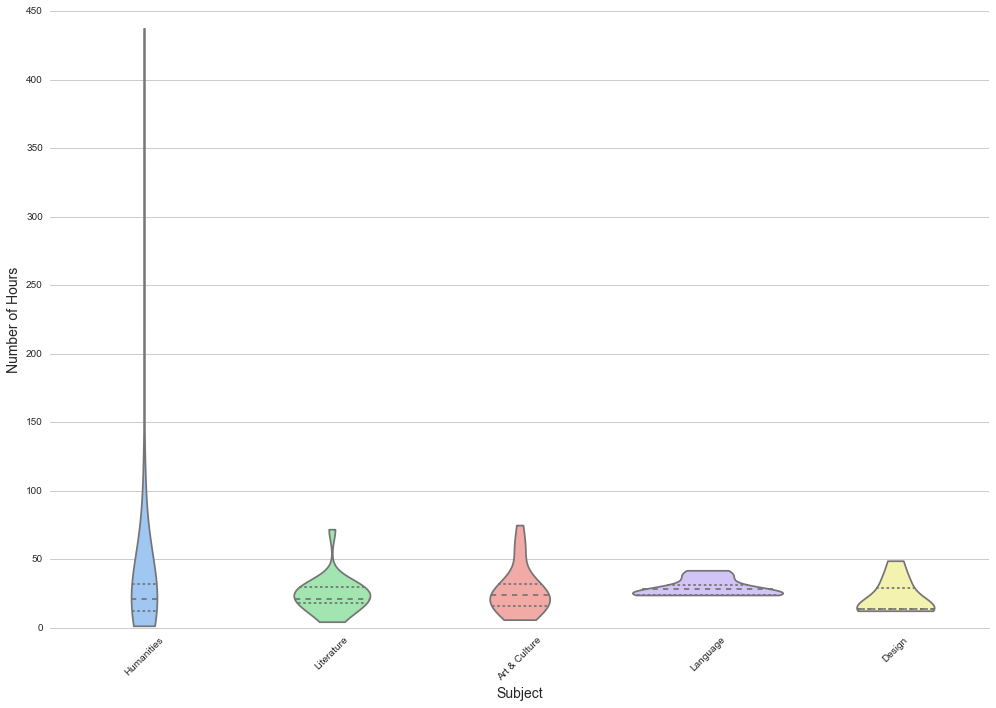

In [402]:
a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="subject", 
               y="expected_hours", 
               data = courses_new_working[courses_new_working['division'] == 'Humanities'],
               order = hum_ordered,
               inner="quart", size = 20, cut = 0)

ax.set_ylabel('Number of Hours', fontsize = 14)
ax.set_xlabel('Subject', fontsize = 14)

sns.despine(left=True)
plt.xticks(rotation=45)

plt.tight_layout()
g1.figure.savefig("HUM_courses_length_dist.png")

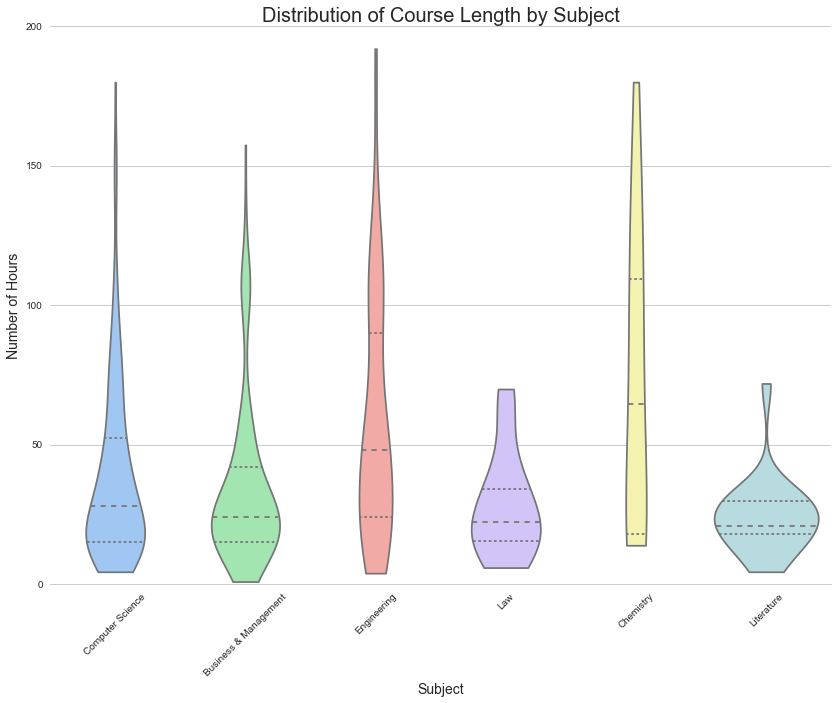

In [274]:
a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="subject", 
               y="expected_hours", 
               data = courses_new_working.loc[courses_new_working['subject'].isin(['Business & Management',
                                                                                  'Computer Science',
                                                                                  'Engineering',
                                                                                  'Law',
                                                                                  'Literature',
                                                                                  'Chemistry'])],
               inner="quart", size = 20, cut = 0)

ax.set_title('Distribution of Course Length by Subject', fontsize = 20)
ax.set_ylabel('Number of Hours', fontsize = 14)
ax.set_xlabel('Subject', fontsize = 14)

sns.despine(left=True)
plt.xticks(rotation=45)

plt.show()

In [176]:
subject_counts = subject_counts.sort_values(['division', 'counts'], ascending = [True, False,])

In [253]:
a4_dims = (14, 9)
fig, ax = plt.subplots(figsize=a4_dims)

g1 = sns.barplot(data = subject_counts.sort_values(['division', 'counts'], ascending = [True, False,]),
            ax = ax,
            x = 'subject', 
            y = 'counts', 
            hue = "division",
            palette="Paired")

ax.set_ylabel('Total', fontsize = 14)
ax.set_xlabel('Subject', fontsize = 14)

plt.xticks(rotation=90)

plt.tight_layout()
g1.figure.savefig("courses_by_subject.png")


In [106]:
courses_inst_sub = pd.DataFrame(courses_new_working.groupby(['institution','division','subject']).size().rename('counts')).reset_index()

In [107]:
courses_inst_sub['log_counts'] = np.log(courses_inst_sub['counts'])

In [264]:
courses_new_working.loc[courses_new_working['institution'] == 'Microsoft']

,title,short_description,institution,subject,price,length,effort,level,prerequisites,course_link,total_hours,total_hours_max,expected_hours,division
0,Introduction to Web Accessibility,Learn the best practices and guidelines needed...,Microsoft,Computer Science,0.0,5 weeks,3-4 hours per week,Intermediate,NaN,https://www.edx.org/course/introduction-web-ac...,15.0,20.0,17.5,Math/Sciences
2,Introduction to Data Analysis using Excel,"Learn the basics of Excel, one of the most pop...",Microsoft,Data Analysis & Statistics,0.0,4 weeks,2-4 hours per week,Introductory,Missing,https://www.edx.org/course/introduction-data-a...,8.0,16.0,12.0,Math/Sciences
3,Build Web APIs using ASP.NET,Learn the skills needed to create RESTful serv...,Microsoft,Computer Science,0.0,4 weeks,3-4 hours per week,Intermediate,Knowledge of C# Knowledge of web technologies ...,https://www.edx.org/course/build-web-apis-usin...,12.0,16.0,14.0,Math/Sciences
16,Developing Dynamic Web Applications Using Angular,Learn the basic concepts behind Angular and th...,Microsoft,Computer Science,0.0,4 weeks,3-4 hours per week,Intermediate,Experience with web development fundamentals.,https://www.edx.org/course/developing-dynamic-...,12.0,16.0,14.0,Math/Sciences
19,Essential Statistics for Data Analysis using E...,Gain a solid understanding of statistics and b...,Microsoft,Data Analysis & Statistics,0.0,6 weeks,2-4 hours per week,Intermediate,NaN,https://www.edx.org/course/essential-statistic...,12.0,24.0,18.0,Math/Sciences
21,Developing a Multidimensional Data Model,"Learn how to design, develop, and manage a mul...",Microsoft,Computer Science,0.0,6 weeks,2-3 hours per week,Intermediate,NaN,https://www.edx.org/course/developing-multidim...,12.0,18.0,15.0,Math/Sciences
40,Writing Professional Code,Writing professional code is a team sport. Lea...,Microsoft,Computer Science,0.0,4 weeks,3-4 hours per week,Intermediate,Â‰Ã›Â¢ Knowledge of C# is required,https://www.edx.org/course/writing-professiona...,12.0,16.0,14.0,Math/Sciences
42,Introduction to C#,NaN,Microsoft,Computer Science,0.0,3 weeks,3-5 hours per week,Introductory,None,https://www.edx.org/course/introduction-c-micr...,9.0,15.0,12.0,Math/Sciences
61,Algorithms and Data Structures,Learn how to write faster and more efficient c...,Microsoft,Computer Science,0.0,5 weeks,3-4 hours per week,Intermediate,Dev277x suggested,https://www.edx.org/course/algorithms-data-str...,15.0,20.0,17.5,Math/Sciences
62,Introduction to Design Thinking,Design Thinking is a creative process that com...,Microsoft,Computer Science,0.0,5 weeks,3-4 hours per week,Introductory,Basic programming & web development skills rec...,https://www.edx.org/course/introduction-design...,15.0,20.0,17.5,Math/Sciences


In [139]:
inst_by_subj = courses_inst_sub.sort_values(['division','subject', 'counts'], ascending = [False, False, False])

In [232]:
top_2 = inst_by_subj.loc[inst_by_subj['subject'].isin(['Computer Science', 'Engineering', 
                                         'Business & Management', 'Economics & Finance',
                                        'Humanities', 'Literature'])]
top_2 = top_2.groupby('subject').head(5)

In [265]:
inst_by_subj.loc[inst_by_subj['subject'] == 'Chemistry'].head(5)

,institution,division,subject,counts,log_counts
456,WageningenX,Math/Sciences,Chemistry,3,1.098612
69,Cooper Union,Math/Sciences,Chemistry,2,0.693147
166,HarvardX,Math/Sciences,Chemistry,2,0.693147
236,MITx,Math/Sciences,Chemistry,2,0.693147
325,SNUx,Math/Sciences,Chemistry,2,0.693147
20,AdelaideX,Math/Sciences,Chemistry,1,0.000000
98,DavidsonX,Math/Sciences,Chemistry,1,0.000000
122,EPFLx,Math/Sciences,Chemistry,1,0.000000
349,TrinityX,Math/Sciences,Chemistry,1,0.000000
439,UTokyoX,Math/Sciences,Chemistry,1,0.000000


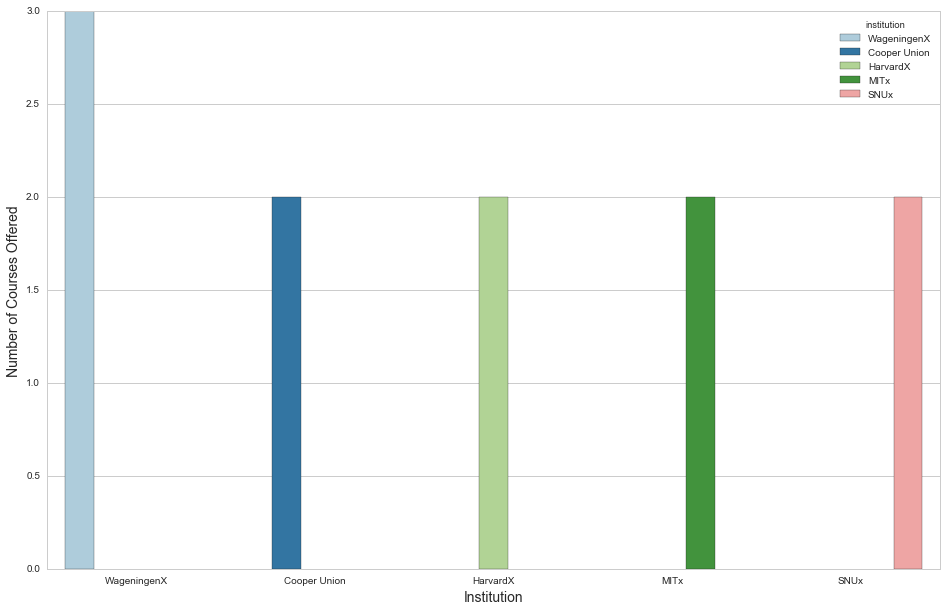

In [266]:
##Chemistry Courses: Top Institutions Graph
a4_dims = (16, 10)
fig, ax = plt.subplots(figsize=a4_dims)

g1 = sns.barplot(data = inst_by_subj.loc[inst_by_subj['subject'] == 'Chemistry'].head(5),
            ax = ax,
            x = 'institution', 
            y = 'counts', 
            hue = "institution",
            palette="Paired")

ax.set_ylabel('Number of Courses Offered', fontsize = 14)
ax.set_xlabel('Institution', fontsize = 14)

plt.show()

g1.figure.savefig("chem_institutions.png")

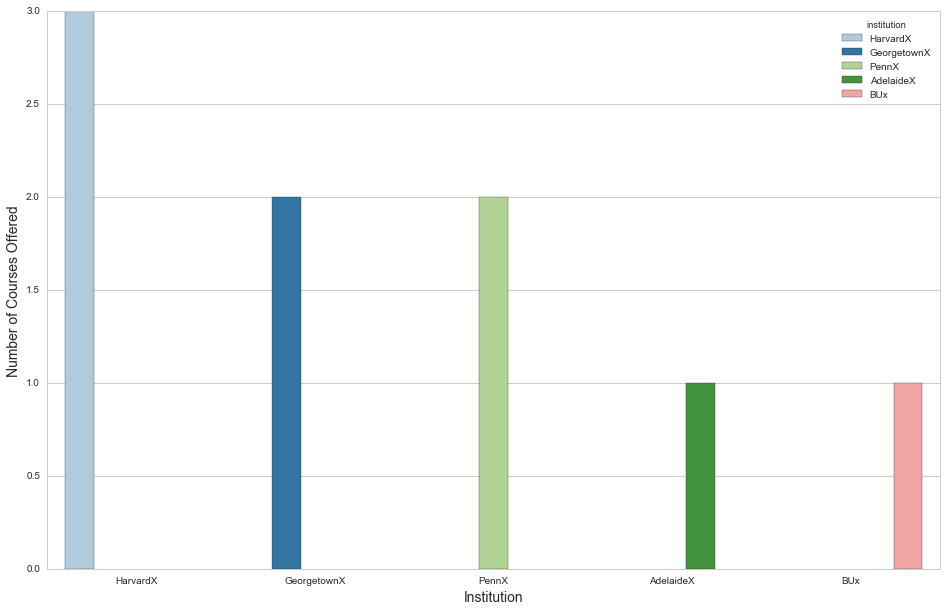

In [267]:
##Law Courses: Top Institutions Graph
a4_dims = (16, 10)
fig, ax = plt.subplots(figsize=a4_dims)

g1 = sns.barplot(data = inst_by_subj.loc[inst_by_subj['subject'] == 'Law'].head(5),
            ax = ax,
            x = 'institution', 
            y = 'counts', 
            hue = "institution",
            palette="Paired")

ax.set_ylabel('Number of Courses Offered', fontsize = 14)
ax.set_xlabel('Institution', fontsize = 14)

plt.show()

g1.figure.savefig("law_institutions.png")

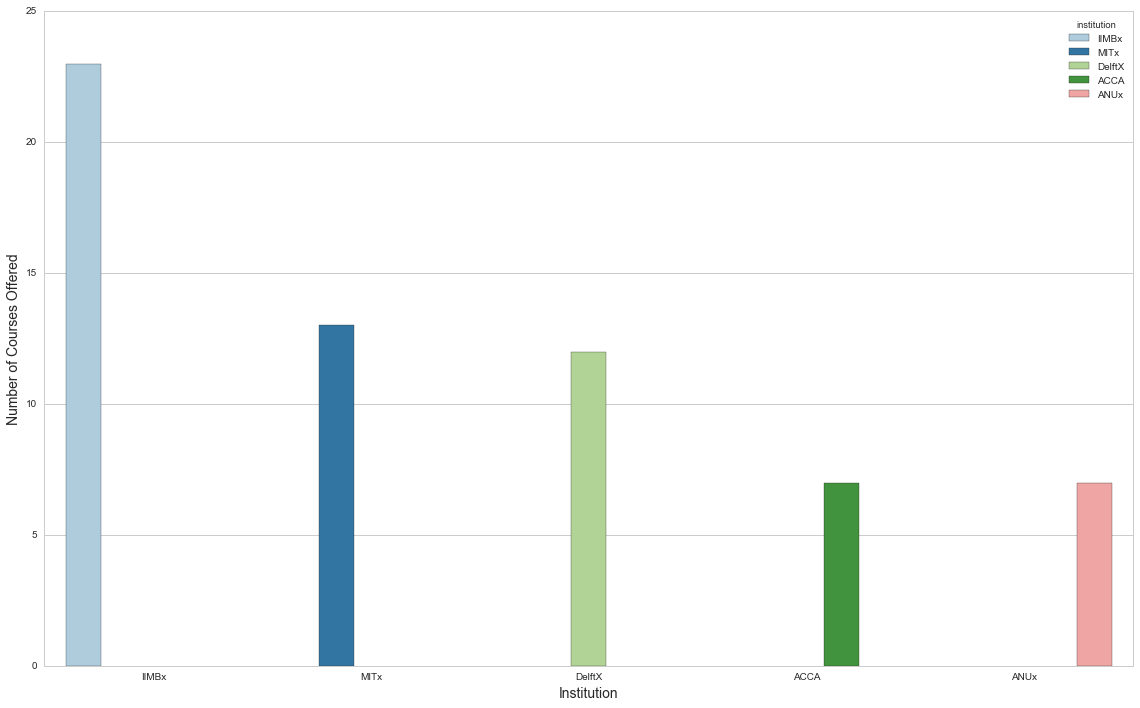

In [260]:
##Business & Management Courses: Top Institutions Graph
a4_dims = (16, 10)
fig, ax = plt.subplots(figsize=a4_dims)

g1 = sns.barplot(data = top_2.loc[top_2['subject'] == 'Business & Management'],
            ax = ax,
            x = 'institution', 
            y = 'counts', 
            hue = "institution",
            palette="Paired")

ax.set_ylabel('Number of Courses Offered', fontsize = 14)
ax.set_xlabel('Institution', fontsize = 14)
plt.tight_layout()

plt.show()

g1.figure.savefig("business_institutions.png")

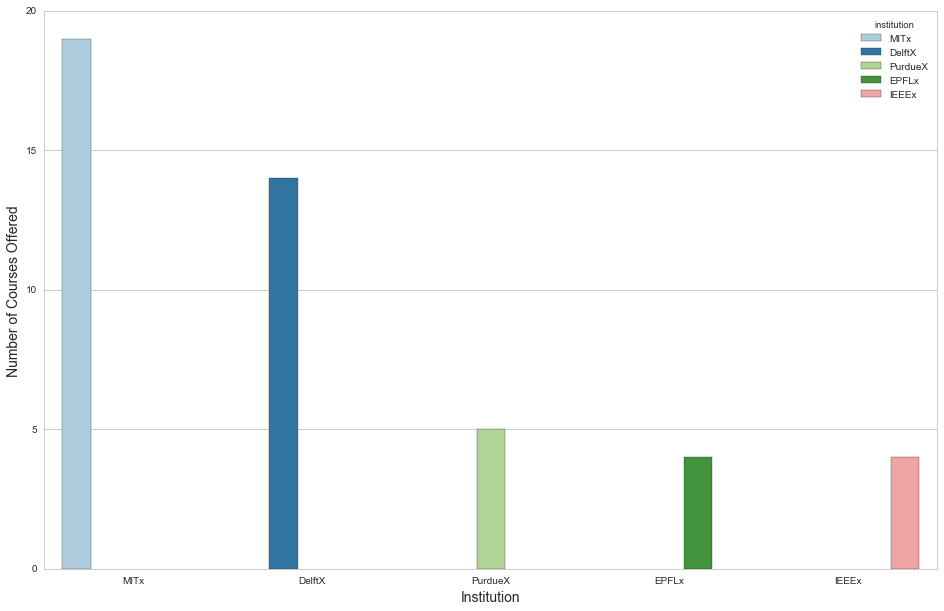

In [261]:
##Engineering Courses: Top Institutions Graph
a4_dims = (16, 10)
fig, ax = plt.subplots(figsize=a4_dims)

g1 = sns.barplot(data = top_2.loc[top_2['subject'] == 'Engineering'],
            ax = ax,
            x = 'institution', 
            y = 'counts', 
            hue = "institution",
            palette="Paired")

ax.set_ylabel('Number of Courses Offered', fontsize = 14)
ax.set_xlabel('Institution', fontsize = 14)

plt.show()

g1.figure.savefig("engineering_institutions.png")

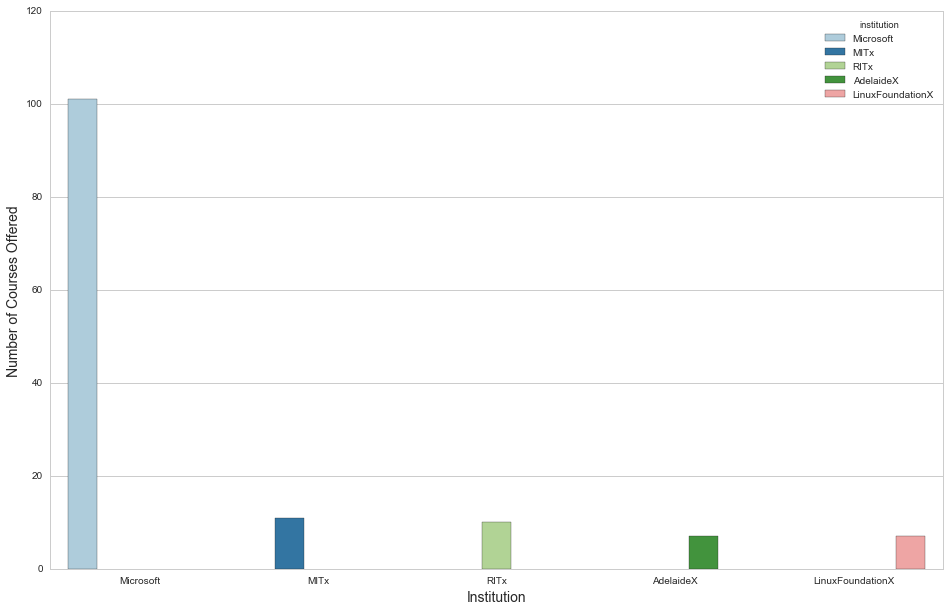

In [262]:
##Computer Science Courses: Top Institutions Graph
a4_dims = (16, 10)
fig, ax = plt.subplots(figsize=a4_dims)

g1 = sns.barplot(data = top_2.loc[top_2['subject'] == 'Computer Science'],
            ax = ax,
            x = 'institution', 
            y = 'counts', 
            hue = "institution",
            palette="Paired")

ax.set_ylabel('Number of Courses Offered', fontsize = 14)
ax.set_xlabel('Institution', fontsize = 14)

plt.show()

g1.figure.savefig("compsci_institutions.png")

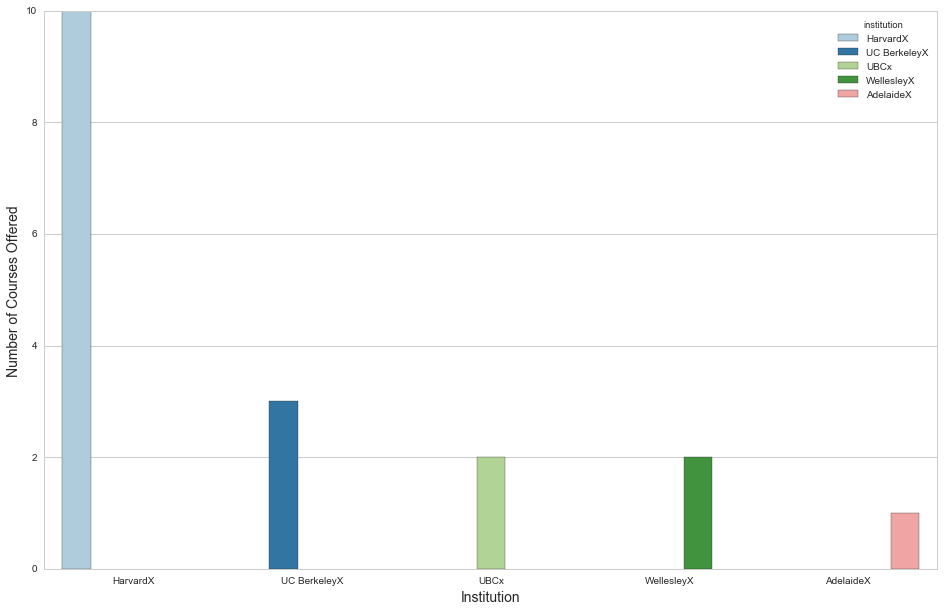

In [263]:
##Literature Courses: Top Institutions Graph
a4_dims = (16, 10)
fig, ax = plt.subplots(figsize=a4_dims)

g1 = sns.barplot(data = top_2.loc[top_2['subject'] == 'Literature'],
            ax = ax,
            x = 'institution', 
            y = 'counts', 
            hue = "institution",
            palette="Paired")

ax.set_ylabel('Number of Courses Offered', fontsize = 14)
ax.set_xlabel('Institution', fontsize = 14)

plt.show()

g1.figure.savefig("lit_institutions.png")

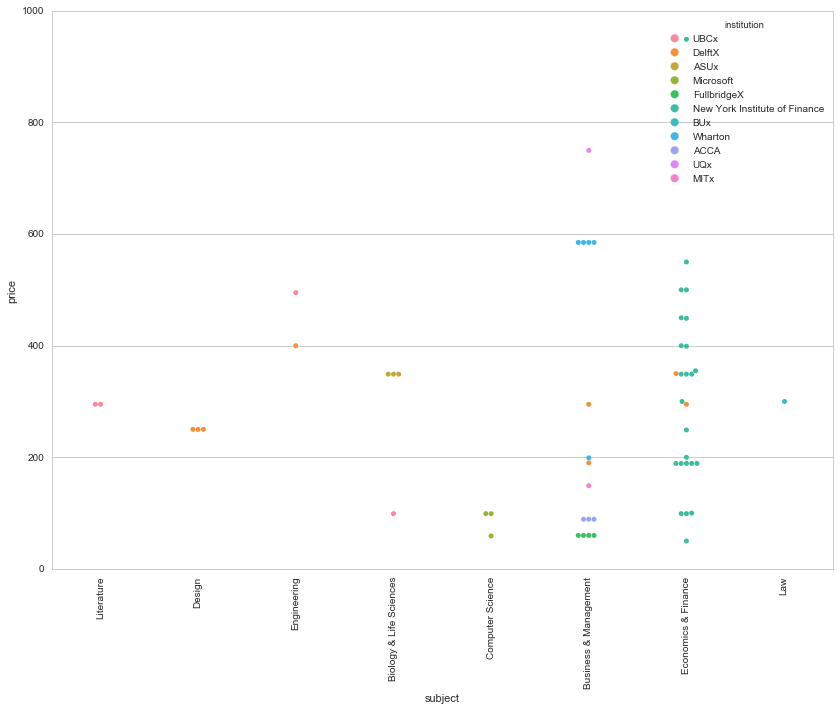

In [251]:
a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.swarmplot(x="subject", 
              y="price", 
              data=courses_new_working.loc[courses_new_working['price'] > 0].sort_values('division'),
              hue = "institution",
              ax = ax)
plt.xticks(rotation=90)
plt.show()

In [249]:
courses_new_working.loc[courses_new_working['price'] > 0]

,title,short_description,institution,subject,price,length,effort,level,prerequisites,course_link,total_hours,total_hours_max,expected_hours,division
25,Marketing Analytics: Data Tools and Techniques,"Learn how to measure, manage and analyze custo...",Wharton,Business & Management,585.0,6 weeks,3-4 hours per week,Intermediate,Basic undergraduate mathematics,https://www.edx.org/course/marketing-analytics...,18.0,24.0,21.0,Social Sciences
26,Managing the Value of Customer Relationships,Learn how to identify your most valuable custo...,Wharton,Business & Management,585.0,6 weeks,3-4 hours per week,Intermediate,NaN,https://www.edx.org/course/managing-value-cust...,18.0,24.0,21.0,Social Sciences
27,"Fundamentals of Digital Marketing, Social Medi...",Build the marketing skills you need to succeed...,Wharton,Business & Management,585.0,6 weeks,2-3 hours per week,Intermediate,Missing,https://www.edx.org/course/fundamentals-digita...,12.0,18.0,15.0,Social Sciences
28,"Selling Ideas: How to Influence Others, and Ge...",Learn how to use social media and word of mout...,Wharton,Business & Management,585.0,6 weeks,2-3 hours per week,Intermediate,Basic marketing concepts,https://www.edx.org/course/selling-ideas-how-i...,12.0,18.0,15.0,Social Sciences
29,Business Strategy from Wharton: Competitive Ad...,Learn how to develop and execute strategies to...,Wharton,Business & Management,199.0,6 weeks,3-4 hours per week,Intermediate,NaN,https://www.edx.org/course/business-strategy-w...,18.0,24.0,21.0,Social Sciences
92,Enabling Office 365 Clients,Learn how to plan and deploy Microsoft Office ...,Microsoft,Computer Science,99.0,9 weeks,3-5 hours per week,Intermediate,NaN,https://www.edx.org/course/enabling-office-365...,27.0,45.0,36.0,Math/Sciences
136,Mortgage Backed Securities (MBS): Part I,Learn about the characteristics of U.S. mortga...,New York Institute of Finance,Economics & Finance,450.0,4 weeks,2 hours per week,Intermediate,None,https://www.edx.org/course/mortgage-backed-sec...,8.0,NaN,8.0,Social Sciences
137,Mortgage Backed Securities (MBS): Professional...,Complete the required exam to earn your profes...,New York Institute of Finance,Economics & Finance,399.0,Missing,2 hours,Intermediate,You must earn a verified certificate in the be...,https://www.edx.org/course/mortgage-backed-sec...,2.0,2.0,2.0,Social Sciences
138,Mortgage Backed Securities (MBS): Part II,Gain in-depth knowledge of the U.S. MBS market...,New York Institute of Finance,Economics & Finance,550.0,4 weeks,2 hours per week,Intermediate,Mortgage Backed Securities (MBS): Part I,https://www.edx.org/course/mortgage-backed-sec...,8.0,NaN,8.0,Social Sciences
217,Customer Protection Rule 15C3-3,"Learn how the Customer Protection Rule, 15C3-3...",New York Institute of Finance,Economics & Finance,449.0,2 weeks,2-3 hours per week,Intermediate,Missing,https://www.edx.org/course/customer-protection...,4.0,6.0,5.0,Social Sciences


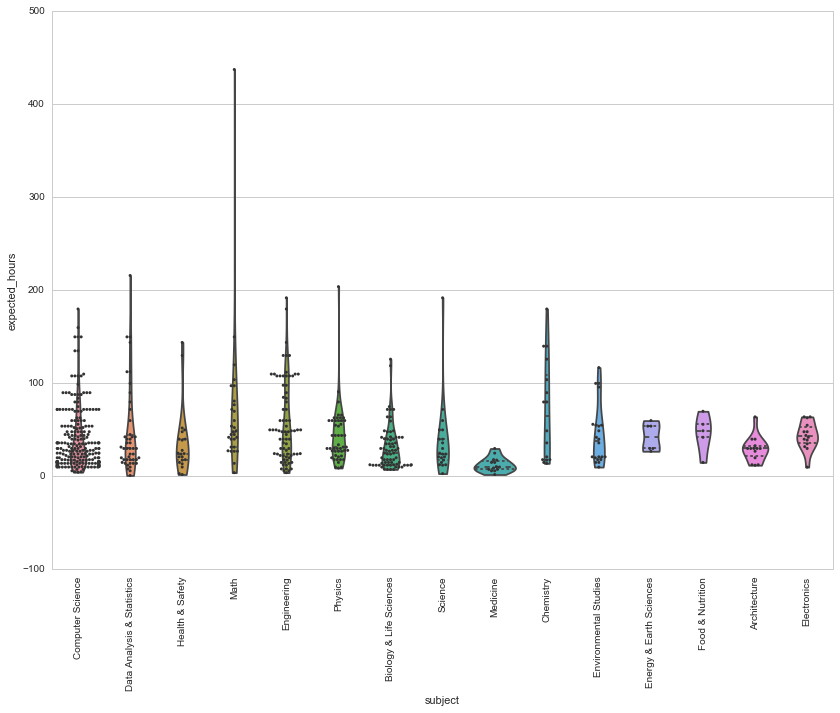

In [147]:
a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.swarmplot(x="subject", 
              y="expected_hours", 
              data=courses_new_working[courses_new_working['division'] == 'Math/Sciences'],
              ax = ax,
             size = 3,
             color = ".2")
# sns.boxplot(x="subject",
#             y="expected_hours",
#             data=courses_new_working[courses_new_working['division'] == 'Math/Sciences'], 
#             whis=np.inf)

sns.violinplot(x="subject", 
               y="expected_hours", 
               data = courses_new_working[courses_new_working['division'] == 'Math/Sciences'],
               inner="quart", size = 20, cut = 0)

plt.xticks(rotation=90)
plt.show()

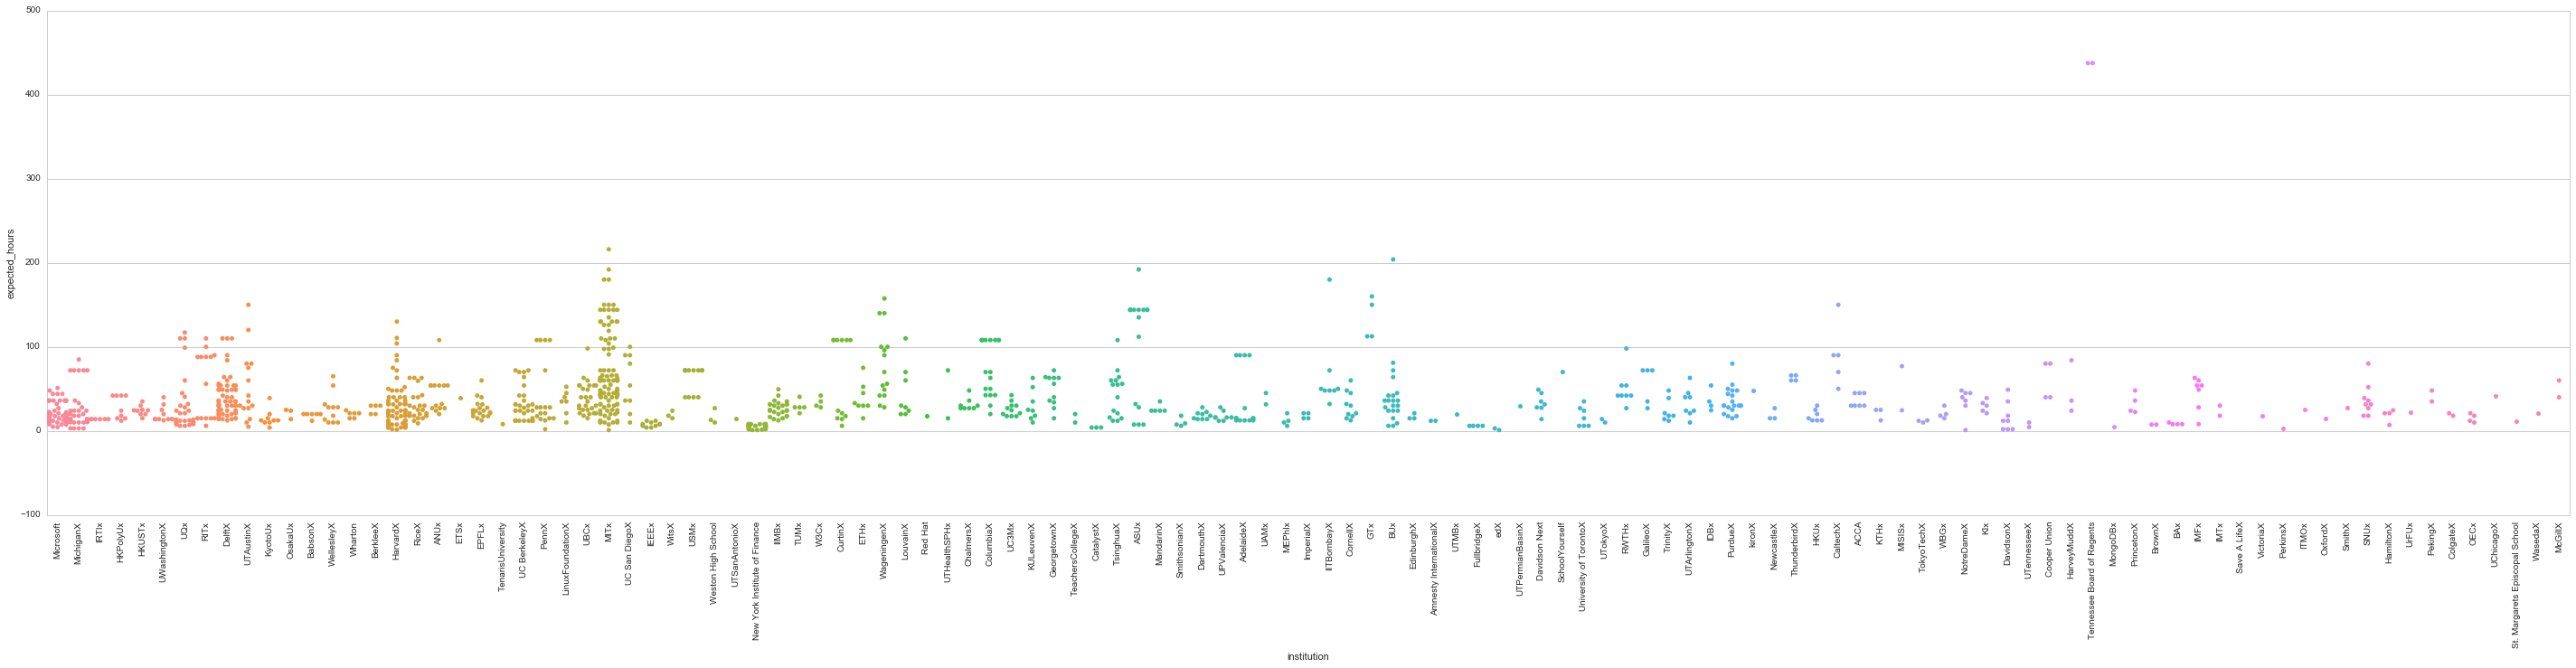

In [143]:
a4_dims = (50, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.swarmplot(x="institution", 
              y="expected_hours", 
              data=courses_new_working,
              ax = ax)
plt.xticks(rotation=90)
plt.show()

In [109]:
hm10 = HeatMap(courses_inst_sub[courses_inst_sub['division'] == 'Math/Sciences'], x='institution', y='subject', values='log_counts', stat=None,
              sort_dim={'x': False}, width=1000)
show(hm10)

In [183]:
from bokeh.layouts import row
from bokeh.plotting import figure, show, output_file
from bokeh import mpl
from math import pi


subjects = subject_counts['subject'].tolist()
counts = subject_counts['counts']


dot = figure(title="Courses by Subject", tools="", toolbar_location=None,
            y_range=[0,275], x_range=subjects)

dot.segment(subjects, 0, subjects, counts, line_width=15, line_color="green")

dot.xaxis.major_label_orientation = pi/3


output_file("whatever.html", title="categorical.py example")

show(dot)  # open a browser

In [194]:
from bokeh.layouts import row
from bokeh.plotting import figure, show, output_file
from bokeh import mpl
from math import pi
from bokeh.models.sources import ColumnDataSource
from bokeh.models.transforms import Jitter
from bokeh.models import Jitter


factors = np.unique(courses_new_working['subject'].tolist())

# without jitter.
nojitter = figure(width=250, plot_height=250, title="no jitter plot", x_range=factors)
nojitter.toolbar_location = None
nojitter.circle(x="model", y="omega", source=ColumnDataSource(data=df),
             alpha=0.3, size=5)


# with jitter
jitter = figure(width=250, plot_height=250, title="jitter plot", x_range=factors)
jitter.toolbar_location = None
for i,(k,grp) in enumerate(df.groupby("subject")):
    jitter.circle(x={'value':i+1, 'transform': Jitter(width=0.4)}, y="omega", 
               source=ColumnDataSource(data=grp),
               alpha=0.3, size=5)

p = row(nojitter, jitter)

show(p)










ValueError: expected an element of either Tuple(Float, Float), Seq(String) or Instance(Range), got array(['Computer Science', 'Art & Culture', 'Data Analysis & Statistics',
       'Economics & Finance', 'Business & Management', 'Humanities',
       'Social Sciences', 'Communication', 'Health & Safety', 'Math',
       'Engineering', 'Physics', 'Biology & Life Sciences', 'Language',
       'Law', 'Science', 'Education & Teacher Training', 'Medicine',
       'Chemistry', 'Literature', 'Environmental Studies',
       'Energy & Earth Sciences', 'History', 'Food & Nutrition',
       'Architecture', 'Ethics', 'Design', 'Music', 'Electronics',
       'Philosophy & Ethics', nan], dtype=object)

In [188]:
subjects = np.unique(courses_new_working['subject'].tolist())

In [198]:
subjects = courses_new_working['subject']
time = courses_new_working['expected_hours']

p = figure(plot_width=700, plot_height=400)

p.circle(x={'subjects': 1, 'transform': Jitter(width=0.3)}, y='time',
         color="navy", alpha=0.3)

p.xaxis.major_label_orientation = pi/3

output_file("whatever1.html", title="categorical1.py example")

show(p)  # open a browser



ValueError: expected an element of either String, Dict(Enum('field', 'value', 'transform'), Either(String, Instance(Transform), Float)) or Float, got {'subjects': 1, 'transform': Jitter(id='2f42e57f-b8f0-44fc-b7f7-49c96a596a20', ...)}

In [197]:
np.random.choice(['a', 'b', 'c', 'd'], 50)

array(['c', 'd', 'd', 'c', 'a', 'a', 'c', 'b', 'd', 'b', 'b', 'd', 'd',
       'b', 'a', 'a', 'd', 'b', 'b', 'b', 'b', 'd', 'd', 'c', 'c', 'a',
       'a', 'a', 'a', 'b', 'c', 'd', 'a', 'c', 'd', 'c', 'd', 'a', 'a',
       'c', 'd', 'd', 'b', 'c', 'b', 'd', 'a', 'a', 'a', 'd'], 
      dtype='<U1')